## 커널 SVM을 사용하여 비선형 문제 풀기
### 선형적으로 구분되지 않는 데이터를 위한 커널 방법

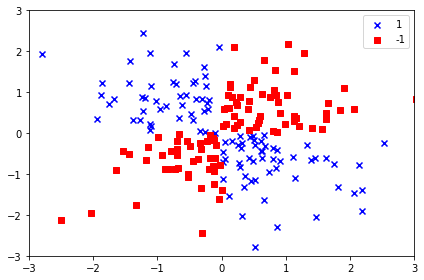

In [1]:
# XOR 형태의 간단한 데이터셋 만들기

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

그림에서 볼 수 있듯이 XOR 문제는 선형적으로 구분 지을 수 없다.<br />
커널 방법(kernel method)는 이와같이 선형적으로 구분되지 않는 데이터를 매핑 함수 $\phi$를 사용해서 선형적으로 구분되는 고차원 공간으로 변경하는 것이다.

SVM으로 비선형 문제를 풀기 위해서 매핑 함수 $\phi$를 사용해서 훈련 데이터를 고차원 특성의 공간으로 변환한다.<br />
이와같은 매핑 방식의 한가지 문제점은 새로운 특성을 만드는 계산 비용이 매우 비싸다는 점이다.<br />
높은 비용 문제를 절감하기 위해서 커널 함수를 정의한다.
가장 널리 사용되는 커널 함수 중 하나는 방사 기저 함수(또는 가우시안 커널)이다.

커널 SVM을 훈련하여 XOR 데이터를 구분하는 비선형 결정 경계를 그려보자.

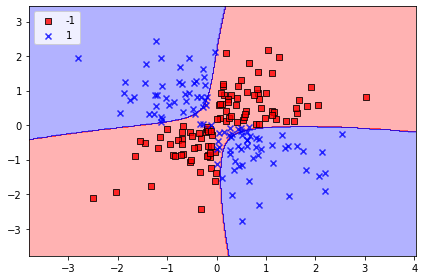

In [2]:
from common import utils
from sklearn.svm import SVC

# 선형 문제를 해결할때 kernel='linear'을 사용한 것과 달리 'rbf'로 해준다.
# gamma는 가우시안 구의 크기를 제한하는 매개변수이다.
# gamma를 크게하면 서포트 벡터의 영향이나 범위가 줄어들고, 결정 경계는 더욱 샘플에 가까워지고 구불구불해진다.
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(x_xor, y_xor)
utils.plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

$\gamma$ (gamma)에 대한 이해를 돕기 위해 붓꽃 데이터셋에 RBF 커널 SVM을 적용해 보자. 

In [3]:
# 붓꽃 데이터 로드 및 표준화

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = datasets.load_iris()     # 붓꽃 데이터 로드
x = iris.data[:, [2, 3]]        # 꽃잎길이, 꽃잎너비 특성을 x에 할당
y = iris.target                 # 꽃 품종에 해당하는 클래스 레이블을 y에 할당
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()   # 특성 표준화(스케일 조정)을 위해서 StandardScaler 클래스를 사용
sc.fit(x_train)         # fit 함수는 각 특성의 차원마다 평균과 표준편차를 계산한다.
x_train_std = sc.transform(x_train) # transform 함수는 평균과 표준편차를 사용해서 특성을 표준화한다.
x_test_std = sc.transform(x_test)   # 테스트 세트도 같은 비율로 이동(표준화)되도록 같은 평균과 표준편차를 사용한다.
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

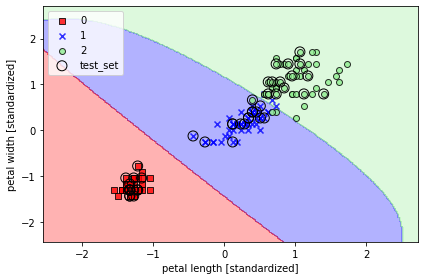

In [4]:
# RBF 커널 SVM 모델을 훈련

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(x_train_std, y_train)
utils.plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

다음과 같이 $\gamma$값을 100으로 하면 클래스 0과 클래스 1 주위로 결정 경계가 매우 가깝게 나타나는 것을 볼 수 있다. 

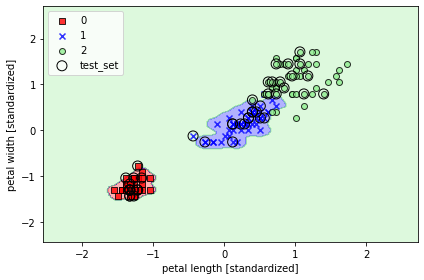

In [5]:
# gamma를 100으로 하고 RBF 커널 SVM 모델을 훈련

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(x_train_std, y_train)
utils.plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

이와 같은 분류기는 훈련 데이터에는 잘 맞지만 본 적 없는 데이터에서는 일반화 오차가 높다.
이를통해 **$\gamma$가 overfitting을 조정하는 중요한 역할을 한다는 것을 알 수 있다.**